# Week 7 hand in

## 01 Assignment

## Exercise 1

1. Go to this website: www.edc.dk
2. Use Selenium to define your search criteria ( area/city, property type)
3. Use Beautiful soup to and Regex to get the following data from the search result:
   Price
   House size
   Sales period (liggetid)   

## Exercise 2

1. Use the extracted data to calculate the following:
   Calculate the average sales price for the seleted area
   Calculate the average size of the selected properties
2. Make a bar plot that shows the number of houses for sale in the three following price ranges:
   0 - 2.000.000
   2.000.001 - 5.000.000
   < 5.000.001
   

Gruppe 5:

- Jonas Sthur Brøchner Nielsen (cph-jb373@cphbusiness.dk)
- Claes Lindholm (cph-cl303@cphbusiness.dk)

## 02 Status
    Ex1: completed
        Task 1, 2, 3: completed
        
        
    Ex2: completed
        Task 1, 2: completed


## 03 Solution part 1

Use selenium to define your search criteria (area/city, property type)

In [67]:
import bs4
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests



base_url = 'https://www.edc.dk/'
profile = webdriver.FirefoxProfile()
profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")

# headless would be needed here if we did not have a GUI version of firefox
options = Options()
options.headless = True
# driver = webdriver.Firefox(options=options, executable_path=r'/tmp/geckodriver')
browser = webdriver.Firefox(options=options)

browser.get(base_url)
browser.implicitly_wait(3)

properties=[]
#area is a string that represents the area, property_types is a list of int from 1 to 9 representing property type
def set_criteria(area, *property_types):    
    try:
        cookie_button = browser.find_element_by_css_selector('button.coi-banner__accept')
        #print('Cookie Button', cookie_button)
        try:
            cookie_button.click()
            sleep(3)
        except Exception as ex:
            print(ex)
    except Exception as e:
        print('BUTTON EXCEPTION',e) 

    
    try:
        area_field = browser.find_element_by_id('TextBoxSearch')
        area_field.send_keys(area)
    except Exception as e:
        print(e)
   
    dropdown= browser.find_element_by_css_selector('a.search-drop-down__btn')
    try:
        try:
            dropdown.click()
        except Exception as e:
            print(e)
    except Exception as ex:
        print("element exceprion: ", ex)


    for pt in property_types:
        try:
            prop_type_checkbox = browser.find_element_by_xpath("//span[@data-etvcode='"+str(pt)+"']")
            #print('\ncheckbox:  ',prop_type_checkbox)
            try:
                prop_type_checkbox.click()
                
            except Exception as ex:
                print(ex)
        except Exception as e:
                print("\nCheckbox exception ",e)
        
    try:              
        search_butt=browser.find_element_by_id('ContentContentPlaceHolder_MainContentPlaceHolder_ContentAreaNewFrontpage_ctl00_ctl02_ctl00_ctl00_ctl00_ctl01_ctl00_buttonSearch')        
        #print('\nPropertie type', search_butt)
        try:
            search_butt.click()
            sleep(3)
        except Exception as ex:
            print(ex)
    except Exception as e:
        print('BUTTON EXCEPTION',e) 
        
    
    
def get_pagination():
    pagination_str=browser.find_element_by_css_selector('li.pagination__text')
    #print('\n\n\nPagination: ',pagination_str)
    #print('\n',pagination_str.text)
    
    page_quantity = pagination_str.text.split()[-1]
    #print("\nPages of results:  ",page_quantity)
    return int(page_quantity)    
    


def get_next_page():
    '''clicks ont next page button'''
    try:
        next_button = browser.find_element_by_id("ContentContentPlaceHolder_MainContentPlaceHolder_ResultPaging_LinkButtonPagingNext")
        #print('\nnext_button  ',type(next_button), next_button.text)
        try:
            next_button.click()
            sleep(3)
        except Exception as ex:
            print(ex)
    except Exception as e:
            print("\nnext_button exception ",e)
    
    
    
    

def read_properties():
    '''read data from page'''
    url=browser.current_url
    r = requests.get(url)
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    #print('\n', url)
    results=soup.select('.propertyitem__wrapper')
    #print('\nResults on page: ',len(results))
    #print(results[0])
    
    for r in results:
        property_dict=get_result(r)
        properties.append(property_dict)
        
        
        
def get_result(res_html):
    '''Price House size Sales period (liggetid)'''
    prop_dict={}
    address=res_html.select('span[itemprop="streetAddress"]')
    price=res_html.select('div.propertyitem__price > strong')
    #print('\price: ',price)    
    prop_dict['address']=address[0].get_text()
    prop_dict['price']=int(price[0].get_text().split()[1].replace('.',''))

    areal_time=res_html.find_all('td')
    #print('\nareal_tid: ',areal_time)
    prop_dict['areal']=areal_time[0].get_text()
    prop_dict['period']=areal_time[4].get_text()

    return prop_dict

    
def get_data():
    set_criteria('2860',1,2,3)
    pages=get_pagination()
    read_properties()
    for i in range(1,pages):
        get_next_page()
        read_properties()
    
print('done')


import pandas as pd

filename='./data/edc_properties.csv'
get_data()
df = pd.DataFrame(properties)

#saves data in file for develepment mode, so scrapping does not need to take place each time the belov code is executed
#df.to_csv(filename, mode='w+',sep=';')
df.to_csv(filename, encoding='utf-8', index=False)

print('done')

done
done


## 04 Solution part 2
    Use the extracted data to calculate the following: 
        Calculate the average sales price for the seleted area 
        Calculate the average size of the selected properties
    Make a bar plot that shows the number of houses for sale in the three following price ranges: 0 - 2.000.000 2.000.001 - 5.000.000 < 5.000.001


avarage_price:  4603140.0 
avarage_size:  123.22000000000001


<IPython.core.display.Javascript object>


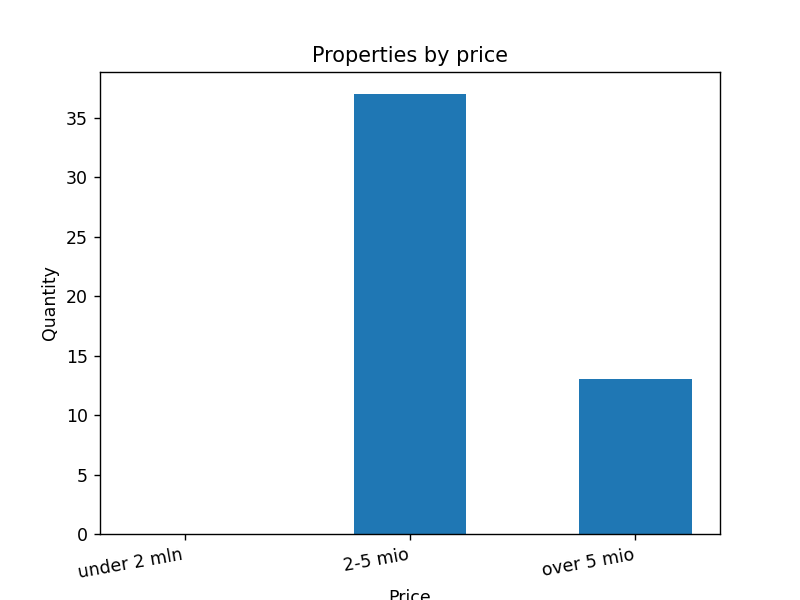

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

filename='./data/edc_properties.csv'
edc = pd.read_csv(filename, sep=",")

avarage_price=sum(edc['price'])/len(edc['price'])
avarage_size=sum(edc['areal']/len(edc['areal']))
print('\navarage_price: ',avarage_price, '\navarage_size: ', avarage_size)


a=edc[edc['price']<2000000]
b=edc[edc['price'].isin(range(2000000,5000000))]
c=edc[edc['price']>=5000000]

plt.title("Properties by price", fontsize=12)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Quantity", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.bar(['under 2 mln',' 2-5 mio','over 5 mio'],[len(a),len(b),len(c)],width=0.5, align='center')
plt.xticks(rotation=10, horizontalalignment='right',fontweight='light')
